In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('Speed_Dating_Data.csv', encoding="ISO-8859-1")

# Présentation du dataset et EDA



In [3]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(8378, 195)

In [5]:
df.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,...,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Business,NaN,UC Berkeley,"1,400.00","26,908.00",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,NaN,107,403,241,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,8.963595,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,0.419551,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,6.134498,5.208251,1.960215,26.358928,NaN,7.662488,NaN,NaN,NaN,2.757186,...,7.332191,0.780825,0.981631,0.376950,1.230615,0.934132,24.384524,16.588583,19.411346,16.233415,10.898075,12.699142,31.330357,15.654266,16.679563,16.418155,7.823909,12.207837,25.610341,10.751267,11.524839,14.276783,9.207503,11.253802,24.970936,10.923285,11.952687,14.959108,9.526191,11.966270,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,5.491068,158.584899,0.370947,0.303539,0.489051,3.563648,1.230689,12.569802,7.044003,6.782895,6.085526,6.126544,6.362746,0.493515,1.950305,1.740575,1.550501,1.954078,1.794080,2.156163,1.841258,2.129354,0.245925,3.566763,NaN,3.758935,NaN,NaN,NaN,1.230905,...,1.521854,1.611694,1.382139,0.484683,1.294557,0.753902,13.712120,7.471537,6.124502,5.163777,5.900697,6.557041,17.551540,9.336288,7.880088,7.231325,6.100502,8.615985,17.477134,5.740351,6.004222,6.927869,6.385852,6.516178,17.007669,6.226283,7.010650,7.935509,6.403117,7.012067,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,

In [6]:
print(df.columns.values)

['iid' 'id' 'gender' 'idg' 'condtn' 'wave' 'round' 'position' 'positin1'
 'order' 'partner' 'pid' 'match' 'int_corr' 'samerace' 'age_o' 'race_o'
 'pf_o_att' 'pf_o_sin' 'pf_o_int' 'pf_o_fun' 'pf_o_amb' 'pf_o_sha' 'dec_o'
 'attr_o' 'sinc_o' 'intel_o' 'fun_o' 'amb_o' 'shar_o' 'like_o' 'prob_o'
 'met_o' 'age' 'field' 'field_cd' 'undergra' 'mn_sat' 'tuition' 'race'
 'imprace' 'imprelig' 'from' 'zipcode' 'income' 'goal' 'date' 'go_out'
 'career' 'career_c' 'sports' 'tvsports' 'exercise' 'dining' 'museums'
 'art' 'hiking' 'gaming' 'clubbing' 'reading' 'tv' 'theater' 'movies'
 'concerts' 'music' 'shopping' 'yoga' 'exphappy' 'expnum' 'attr1_1'
 'sinc1_1' 'intel1_1' 'fun1_1' 'amb1_1' 'shar1_1' 'attr4_1' 'sinc4_1'
 'intel4_1' 'fun4_1' 'amb4_1' 'shar4_1' 'attr2_1' 'sinc2_1' 'intel2_1'
 'fun2_1' 'amb2_1' 'shar2_1' 'attr3_1' 'sinc3_1' 'fun3_1' 'intel3_1'
 'amb3_1' 'attr5_1' 'sinc5_1' 'intel5_1' 'fun5_1' 'amb5_1' 'dec' 'attr'
 'sinc' 'intel' 'fun' 'amb' 'shar' 'like' 'prob' 'met' 'match_es'
 'attr1_s

In [7]:
df.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

In [8]:
100*(df.isnull().sum()/len(df))

iid          0.000000
id           0.011936
gender       0.000000
idg          0.000000
condtn       0.000000
              ...    
attr5_3     75.936978
sinc5_3     75.936978
intel5_3    75.936978
fun5_3      75.936978
amb5_3      75.936978
Length: 195, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


### GENRE


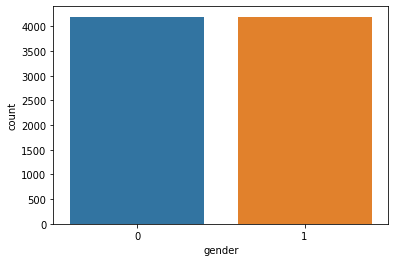

In [10]:
sns.countplot(df['gender'])

In [11]:
df['gender'].value_counts()

1    4194
0    4184
Name: gender, dtype: int64

Il y a autant d'hommes et de femmes dans le dataset.


### AGE


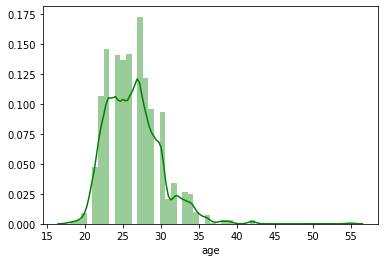

In [12]:
sns.distplot(df['age'], color='green')

La majorité des participants ont entre 20 et 30 ans.


### MATCH

In [13]:
df['match'].value_counts()

0    6998
1    1380
Name: match, dtype: int64

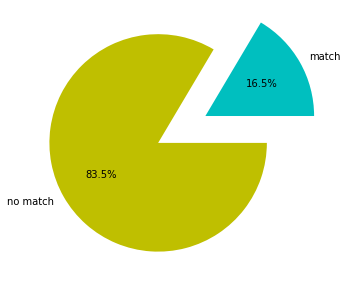

In [14]:
labels ='match', 'no match'
values=[1380,6998]
plt.figure(figsize=(5,5))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors='cyan',explode=(0.5,0))
plt.show()

16.5% des participants ont obtenu un second rendez-vous suite au speed dating.


### GESTION DES DONNÉES MANQUANTES
Ce dataset comprend beaucoup de données NaN, retirons les colonnes avec plus de 50% de données manquantes (plus de 4000 données manquantes).

In [15]:
date1 = df.iloc[:,:35]

In [16]:
date2 = df.iloc[:,39:70]

In [17]:
date1.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
dtype: int64

In [18]:
date1= date1.drop(['shar_o','id', 'positin1'], axis=1 )

In [19]:
date1.isnull().sum()

iid           0
gender        0
idg           0
condtn        0
wave          0
round         0
position      0
order         0
partner       0
pid          10
match         0
int_corr    158
samerace      0
age_o       104
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
dec_o         0
attr_o      212
sinc_o      287
intel_o     306
fun_o       360
amb_o       722
like_o      250
prob_o      318
met_o       385
age          95
field        63
dtype: int64

In [20]:
date2.isnull().sum()

race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      79
reading       79
tv            79
theater       79
movies        79
concerts      79
music         79
shopping      79
yoga          79
exphappy     101
expnum      6578
attr1_1       79
dtype: int64

In [21]:
date2= date2.drop(['zipcode','income', 'expnum'], axis=1 )

In [22]:
date = pd.concat([date1,date2], axis=1)

In [23]:
date.isnull().sum()

iid           0
gender        0
idg           0
condtn        0
wave          0
round         0
position      0
order         0
partner       0
pid          10
match         0
int_corr    158
samerace      0
age_o       104
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
dec_o         0
attr_o      212
sinc_o      287
intel_o     306
fun_o       360
amb_o       722
like_o      250
prob_o      318
met_o       385
age          95
field        63
race         63
imprace      79
imprelig     79
from         79
goal         79
date         97
go_out       79
career       89
career_c    138
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
exphappy    101
attr1_1      79
dtype: int64

In [24]:
date= date.dropna()

In [25]:
date.isnull().sum()

iid         0
gender      0
idg         0
condtn      0
wave        0
round       0
position    0
order       0
partner     0
pid         0
match       0
int_corr    0
samerace    0
age_o       0
race_o      0
pf_o_att    0
pf_o_sin    0
pf_o_int    0
pf_o_fun    0
pf_o_amb    0
pf_o_sha    0
dec_o       0
attr_o      0
sinc_o      0
intel_o     0
fun_o       0
amb_o       0
like_o      0
prob_o      0
met_o       0
age         0
field       0
race        0
imprace     0
imprelig    0
from        0
goal        0
date        0
go_out      0
career      0
career_c    0
sports      0
tvsports    0
exercise    0
dining      0
museums     0
art         0
hiking      0
gaming      0
clubbing    0
reading     0
tv          0
theater     0
movies      0
concerts    0
music       0
shopping    0
yoga        0
exphappy    0
attr1_1     0
dtype: int64

In [26]:
date.dtypes

iid           int64
gender        int64
idg           int64
condtn        int64
wave          int64
round         int64
position      int64
order         int64
partner       int64
pid         float64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
amb_o       float64
like_o      float64
prob_o      float64
met_o       float64
age         float64
field        object
race        float64
imprace     float64
imprelig    float64
from         object
goal        float64
date        float64
go_out      float64
career       object
career_c    float64
sports      float64
tvsports    float64
exercise    float64
dining      float64
museums     float64
art         float64
hiking      float64
gaming      float64
clubbing    float64


### EXPLICATION DES MATCHS AU TRAVERS DE LA DATAVIZ


#### Données sociodémographiques

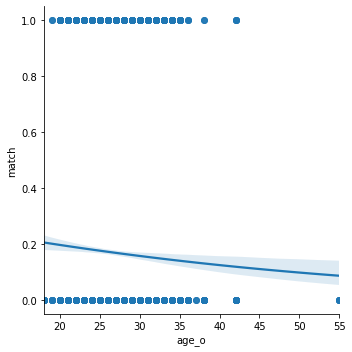

In [27]:
sns.lmplot(x = 'age_o', y = 'match', data=date, logistic=True)

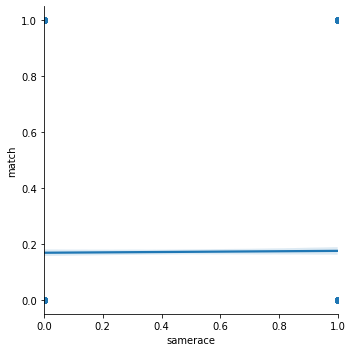

In [28]:
sns.lmplot(x = 'samerace', y = 'match', data=date, logistic=True)

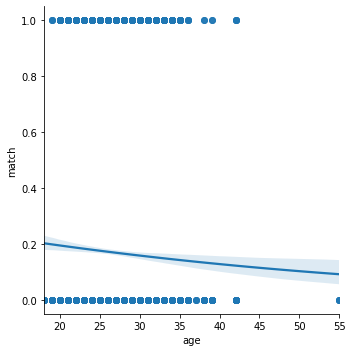

In [29]:
sns.lmplot(x = 'age', y = 'match', data=date, logistic=True)

L'age et la nationalité ne sont pas des variables pertinentes pour expliquer les matchs 

#### Autres données (physique , caractère, intérêt)

Retirons du dataset les données de type objet afin de générer une matrice de corrélation.

In [30]:
dating=date.drop(['field','career','from'], axis=1)

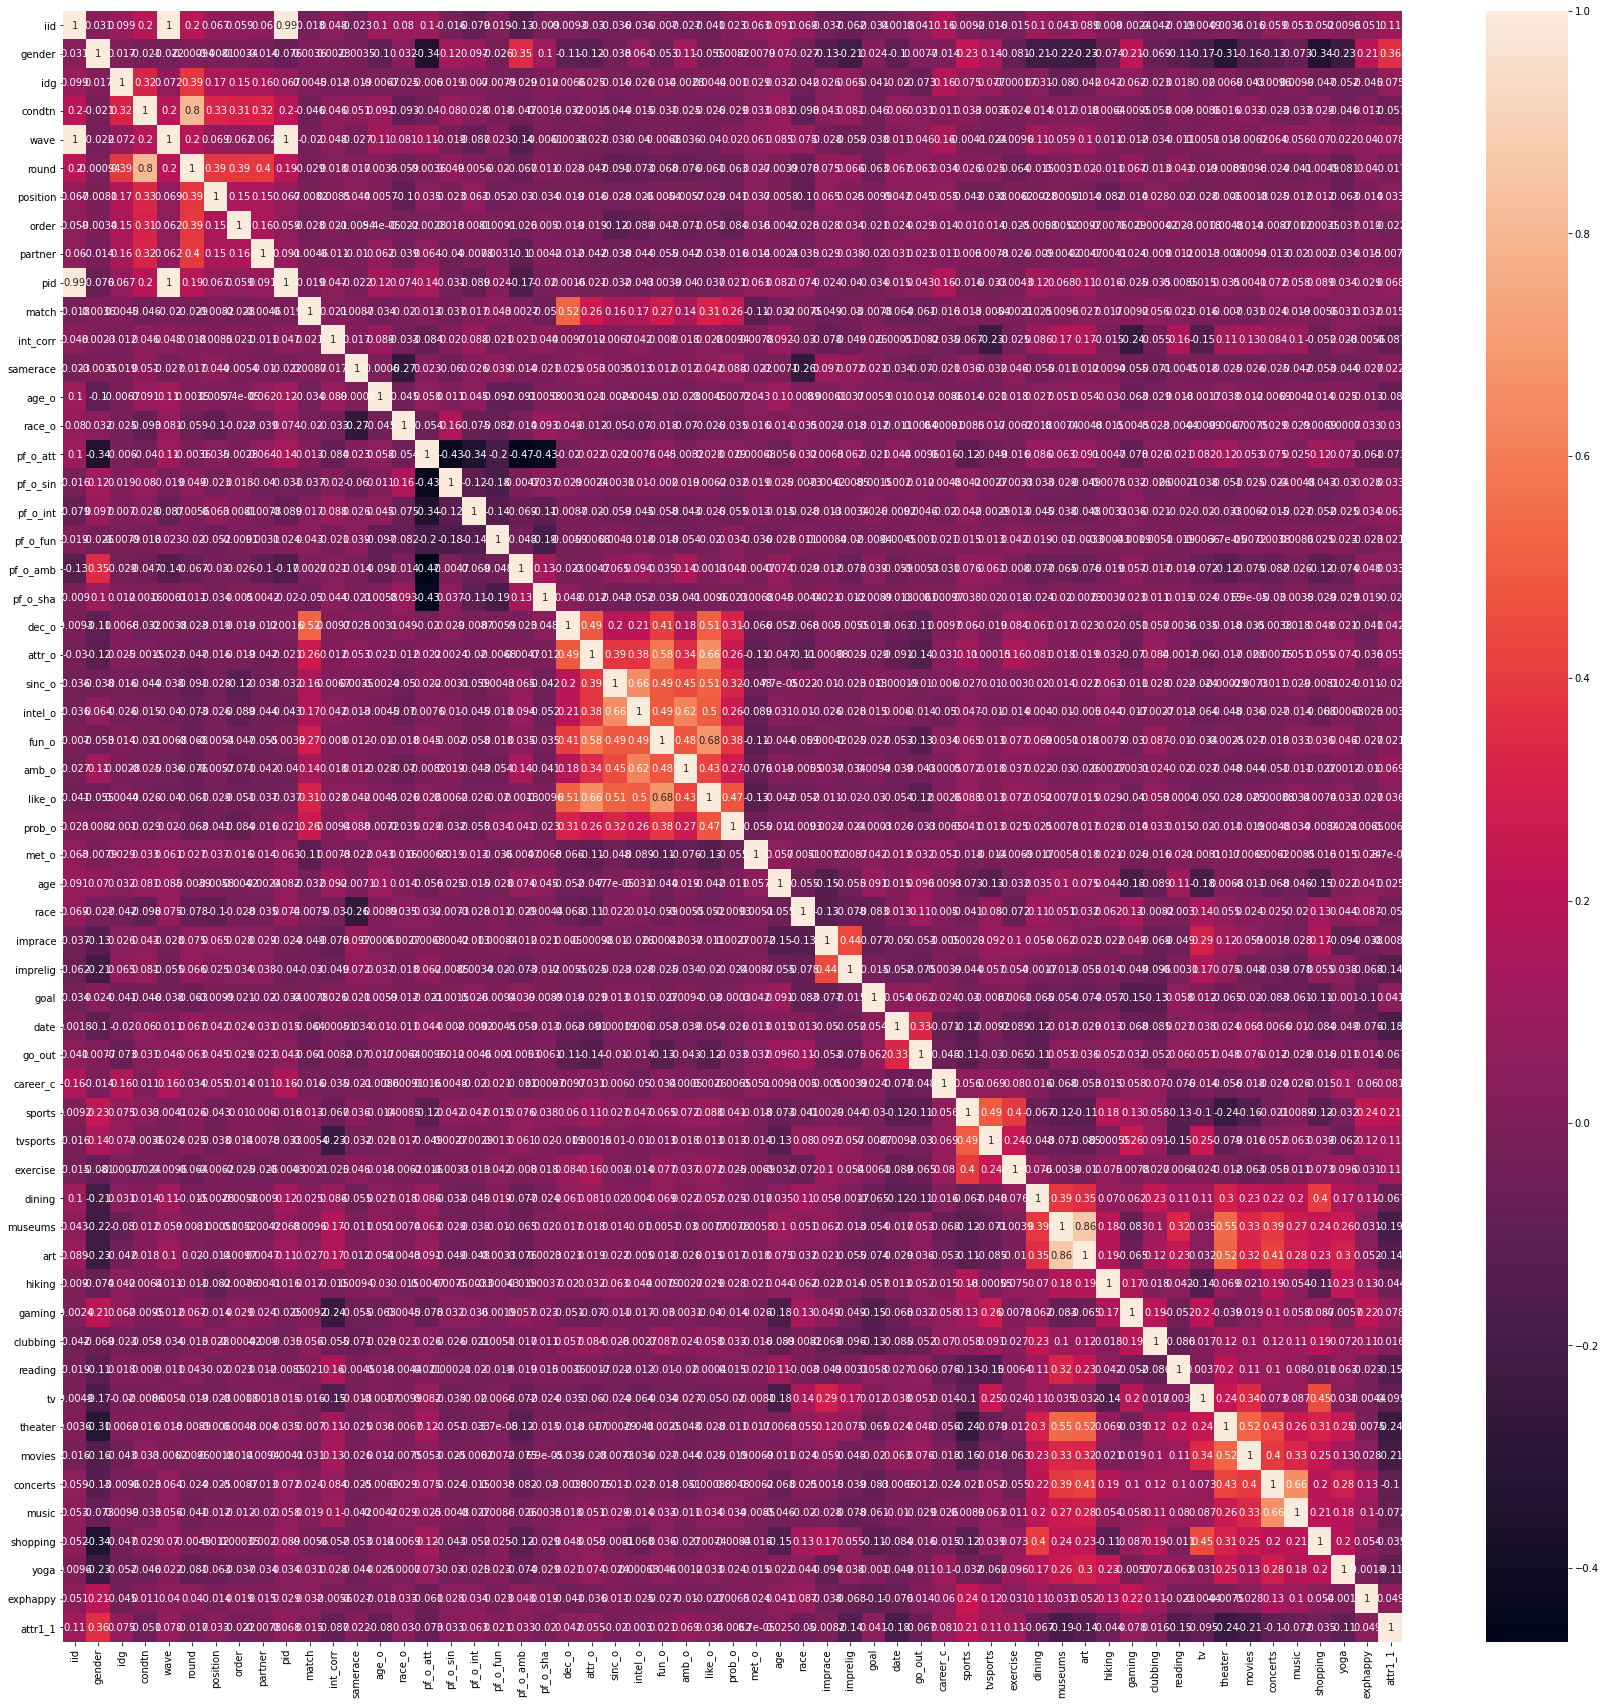

In [31]:
corr = dating.corr()
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corr, annot=True, ax=ax)

In [59]:
dating2 = dating.iloc[:,:36]

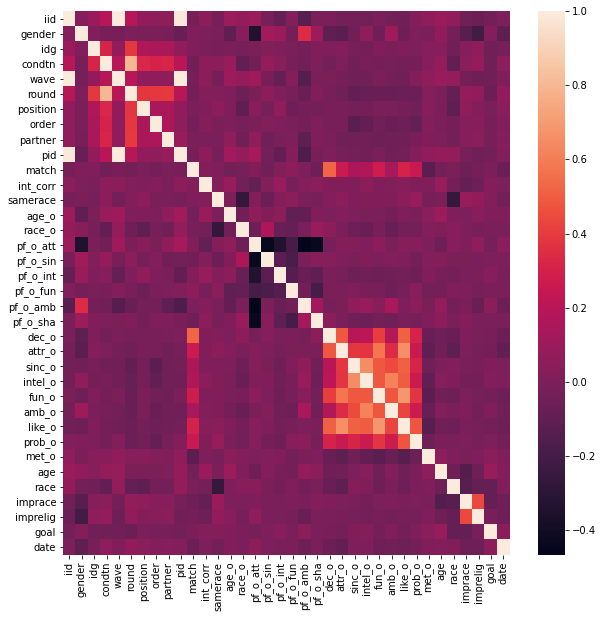

In [64]:
corr = dating2.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, ax=ax)


Selon la matrice de corrélation, la variable match est plutôt corrélée à la variable 'décision du partenaire'. En effet, un match nécessite une réponse positive des deux côtés.

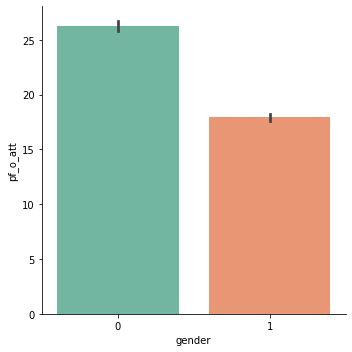

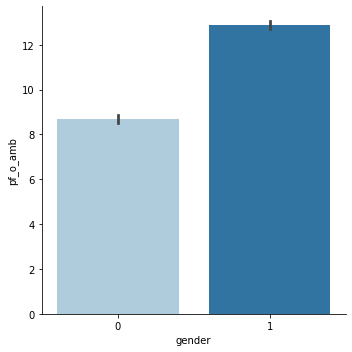

In [32]:

sns.catplot(x ='gender', y = 'pf_o_att', data=date, kind='bar',palette='Set2')


sns.catplot(x ='gender', y = 'pf_o_amb', data=date, kind='bar', palette=('Paired'))



Parmi les qualités attendues, la beauté est plus importante pour l'homme et l'ambition plus importante pour la femme.

In [33]:
decision = date['dec_o'].apply(lambda x: 'Oui' if x==1
                               else 'Non')
decision.value_counts()

Non    4008
Oui    3015
Name: dec_o, dtype: int64

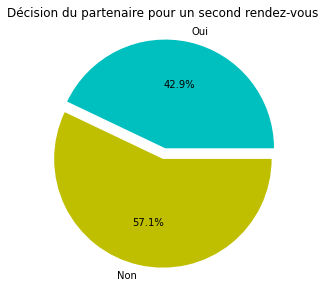

In [53]:


labels ='Oui', 'Non'
values=[3044,4047]
plt.figure(figsize=(5,5))
plt.pie(values, labels=labels, autopct='%1.1f%%',colors = 'cyan', explode=(0.1,0))
plt.title("Décision du partenaire pour un second rendez-vous") 

plt.show()

In [35]:
decision_genre = date.groupby('gender')['dec_o'].sum()
decision_genre

gender
0    1703
1    1312
Name: dec_o, dtype: int64

Les femmes acceptent moins un second rendez-vous

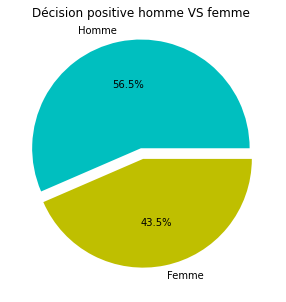

In [58]:

labels ='Homme', 'Femme'
values=[1720,1324]
plt.figure(figsize=(5,5))
plt.pie(values, labels=labels, autopct='%1.1f%%',colors = 'cyan', explode=(0.1,0))
plt.title("Décision positive homme VS femme ") 

plt.show()

#### Importance des différents critères

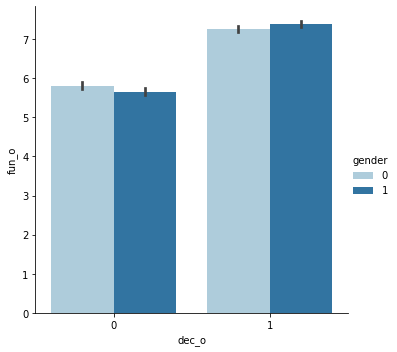

In [37]:

sns.catplot(x="dec_o", y="fun_o", data=date, kind='bar', hue='gender', palette='Paired')

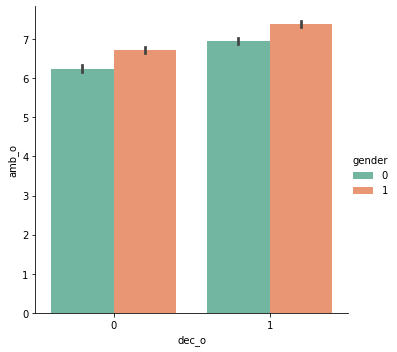

In [38]:
sns.catplot(x="dec_o", y="amb_o", data=date, kind='bar', hue='gender', palette='Set2')

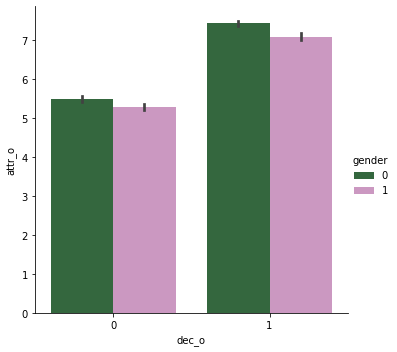

In [39]:
sns.catplot(x="dec_o", y="attr_o", data=date, kind='bar', hue='gender', palette='cubehelix')

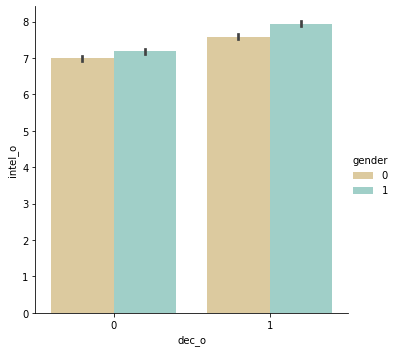

In [40]:
sns.catplot(x="dec_o", y="intel_o", data=date, kind='bar', hue='gender', palette='BrBG')

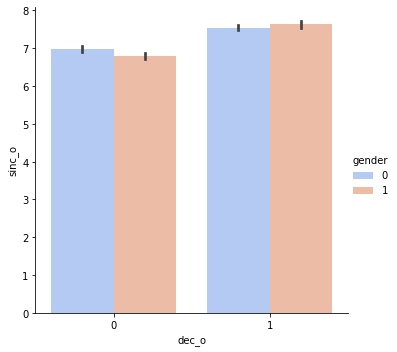

In [41]:
sns.catplot(x="dec_o", y="sinc_o", data=date, kind='bar', hue='gender', palette='coolwarm')

Les critères 'drôle' et 'beauté' sont les plus importants pour expliquer une décision positive du partenaire. Voyons si elles sont aussi importantes pour un match. Les femmes accordent plus d'importance aux critères 'ambition' et 'intelligence' que les hommes. Les hommes accordent plus d'importance au physique.


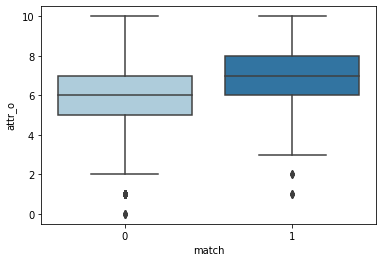

In [42]:
sns.boxplot(x="match", y="attr_o", data=date, palette='Paired')

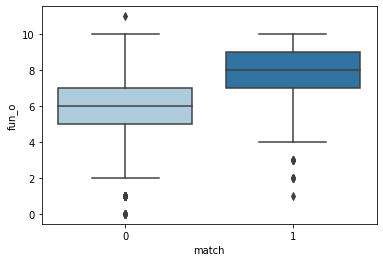

In [43]:
sns.boxplot(x="match", y="fun_o", data=date, palette='Paired')

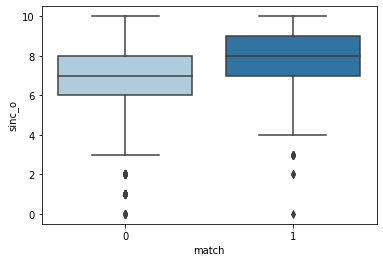

In [44]:
sns.boxplot(x="match", y="sinc_o", data=date, palette='Paired')

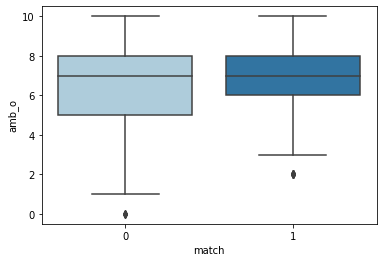

In [45]:
sns.boxplot(x="match", y="amb_o", data=date, palette='Paired')

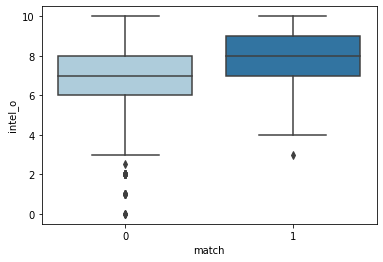

In [46]:
sns.boxplot(x="match", y="intel_o", data=date, palette='Paired')

L'humour joue un rôle important sur l'obtention d'un second rendez-vous.

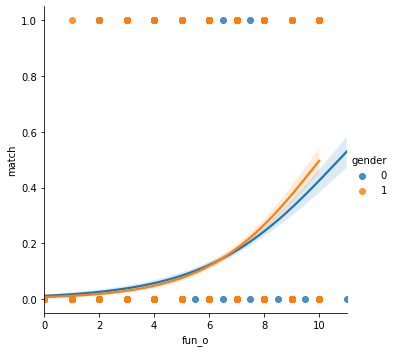

In [47]:
sns.lmplot(x = 'fun_o', y = 'match', data=date, logistic=True, hue='gender')

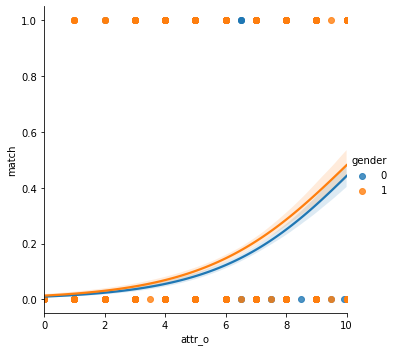

In [48]:
sns.lmplot(x = 'attr_o', y = 'match', data=date, logistic=True, hue='gender')

Si le premier critère d'un match semble la beauté, l'humour est un second critère important, notamment pour que la femme accepte un second rendez-vous.



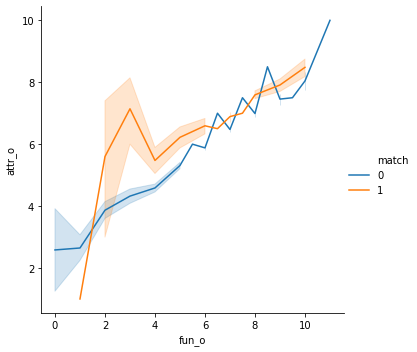

In [75]:
sns.relplot(x='fun_o',y='attr_o', data=date, hue='match', kind='line')